# Simulating a rock sample

Notebook to generate a set of spheres

#### Import libraries

In [1]:
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, Prism, PolygonalPrism
from fatiando.gravmag import sphere, prism, polyprism

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'simulation_rock_sample.ipynb'

#### Importing auxiliary functions

In [3]:
dir_modules = '../../'
sys.path.append(dir_modules)

In [4]:
import my_package as fc

#### Loading 2D grid properties

In [5]:
with open('data/regular_grid.pickle') as f:
        regular = pickle.load(f)

### Loading sample bounds

In [6]:
with open('data/set_bounds.pickle') as f:
        bounds = pickle.load(f)

## Open a dictionary

In [7]:
model_rock = dict()

#### List of saved files

In [8]:
saved_files = []

### Observation area

In [9]:
print 'Area limits: \n x_max = %.1f $\mu m$ \n x_min = %.1f $\mu m$ \n y_max = %.1f $\mu m$ \n y_min = %.1f $\mu m$' % (regular['area'][1], regular['area'][0],regular['area'][3],regular['area'][2])

Area limits: 
 x_max = 0.0 $\mu m$ 
 x_min = -36084.0 $\mu m$ 
 y_max = 29636.0 $\mu m$ 
 y_min = 0.0 $\mu m$


## Plotting sample bounds

In [10]:
verts1 = []
for i in range(len(bounds['vert1_x'])):
    verts1.append([bounds['vert1_x'][i],bounds['vert1_y'][i]])

In [11]:
print verts1

[[-19049.38292310268, 2648.04178351841], [-7291.359974531253, 3513.1355739491737], [-7766.431608816965, 18728.608711525565], [-11507.620728816964, 19695.478242007008], [-10676.24536881697, 23766.50784403413], [-18574.311288816967, 25751.134775022358], [-19821.374328816968, 24122.722934211502], [-20177.67805453125, 22290.759613299302], [-25462.849985959827, 21018.56286266582], [-25878.537665959826, 18270.61788129751], [-23918.867174531253, 17609.075570968103], [-26591.145117388398, 5803.08972508943], [-22909.33995167411, 2902.481133645105]]


/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


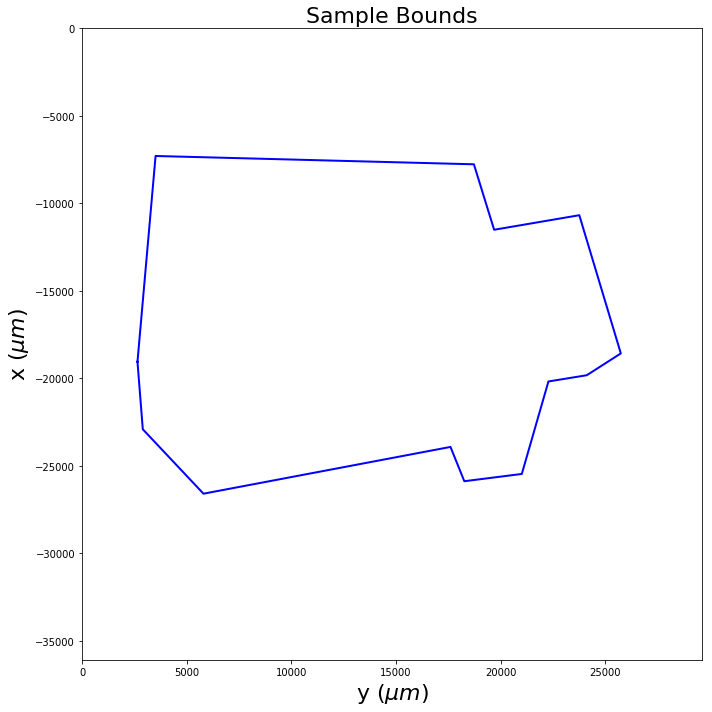

In [12]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.xlabel('y ($\mu m$)', fontsize = title_font)
plt.ylabel('x ($\mu m$)', fontsize = title_font)
plt.title('Sample Bounds',fontsize=title_font)
plt.plot(bounds['poly1_y'], bounds['poly1_x'],color='b',linestyle='-',linewidth=2)
plt.xlim(np.min(regular['y']),np.max(regular['y']))
plt.ylim(np.min(regular['x']),np.max(regular['x']))

#file_name = 'figs/sample_bounds'
#plt.savefig(file_name+'.png',dpi=200)
#saved_files.append(file_name+'.png')


plt.show()

### Side lengths

In [13]:
model_rock['lz'] = 2500. 

### Magnetization direction

In [14]:
mag = 1.2
inc = 90.
dec = 0.

In [15]:
model_rock['mag_prism']= ang2vec(mag,inc,dec)

### Generating model

In [16]:
model_rock['prism'] = [PolygonalPrism(verts1, -0.5*model_rock['lz'], 0.5*model_rock['lz'],
                                      {'magnetization':model_rock['mag_prism']})]

### Random spheres within prism

#### Generating the center coordinates and dimension of spheres

In [17]:
lx_max= -9000.
lx_min = -15000.
ly_max = 18500.
ly_min = 4000.

In [18]:
np.random.seed(seed=40)
n = 300
R = 50.
dec_min = 0.
dec_max = 1.
inc_min = 89.
inc_max = 90.
Coordx = np.random.uniform(lx_min + R, lx_max - R,n) 
Coordy = np.random.uniform(ly_min + R, ly_max - R,n) 
Coordz = np.random.uniform(-0.5*model_rock['lz']+R,+0.5*model_rock['lz']-R,n)
dec_rand = np.random.uniform(dec_min,dec_max,n)
inc_rand = np.random.uniform(inc_min,inc_max,n)

#### Random magnetization direction

In [19]:
mag_sph= 500.
mag_rand = []
for i in range(n):
    mag_rand.append(ang2vec(mag_sph,inc_rand[i],dec_rand[i]))

In [20]:
model_rock['spheres'] = []
for i in range(n):
    model_rock['spheres'].append(Sphere(Coordx[i], Coordy[i], Coordz[i], R , {'magnetization': mag_rand[i]}))

#### Generating .pickle file

In [21]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
model_rock['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [22]:
file_name = 'data/model_rock.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model_rock, f)
    
saved_files.append(file_name)

#### Saved files

In [23]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  data/model_rock.pickle
